In [3]:
metabolite = read.csv('./metabolomics_data.csv',row.names = 1)

In [5]:
metabolite = as.data.frame(t(metabolite))

In [6]:
head(metabolite)

,"LysoPC(20:4(5Z,8Z,11Z,14Z))",LysoPC(18:0),LysoPC(16:0),7-Ketodeoxycholic acid,LysoPC(18:1(11Z)),LysoPC(15:0),"LysoPC(22:6(4Z,7Z,10Z,13Z,16Z,19Z))",LysoPC(17:0),LysoPC(16:1(9Z)/0:0),"LysoPC(20:4(8Z,11Z,14Z,17Z))",⋯,dTDP-D-glucose,Tuftsin,Methyl (methylthio)methyl disulfide,L-Cysteinylglycine disulfide,5-Phosphoribosylamine,"Beta-1,4-mannose-N-acetylglucosamine",Phenylglucuronide,5-Hydroxykynurenamine,S-Acetyldihydrolipoamide-E,Pregnanediol-3-glucuronide
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KO.CLP1,86674.91,2009726.5,1579107.8,460947.830,279205.21,23669.757,283190.51,45508.022,80256.25,420584.5,⋯,2316.6981,8702.270,835.5999,9006.238,1193.4600,3510.625,3.833886e+02,448.3495,12784.52,3382.5189730
KO.CLP2,218881.88,3334212.1,3615409.8,115990.263,767694.32,56142.911,329416.01,83720.945,207267.48,877852.9,⋯,2658.3174,4070.373,918.1100,9516.874,1002.6739,2782.087,5.500556e+02,685.7913,13629.43,0.0000034
KO.CLP3,280332.43,2450525.1,2907057.4,229030.876,756848.18,43735.806,581754.56,71176.672,571454.80,1680398.7,⋯,2297.6726,3905.091,906.1865,20585.933,786.1848,1816.052,3.400000e-06,144.0258,10648.75,2354.9579010
KO.CLP4,178108.08,2989967.5,2807052.4,342532.548,552460.68,44706.247,375827.75,62127.451,181895.61,748006.3,⋯,1744.2276,2543.624,880.2076,4609.820,1434.3312,2268.553,2.789847e+02,2480.7796,12846.09,815.7872259
KO.CLP5,119883.50,1876162.6,1526425.9,191981.327,348781.84,22036.986,173685.95,34351.200,85034.93,430324.9,⋯,1540.9552,4332.483,929.7562,5013.528,1616.6706,3019.204,7.282508e+02,475.7596,13432.93,0.0000034
KO.CLP6,32693.82,348891.2,322352.5,8781.413,60195.55,4551.547,59134.85,4423.994,16557.02,134463.5,⋯,603.4083,4000.264,981.6763,21426.088,798.1855,1486.328,1.757326e+04,753.7356,14646.91,488.5435476


In [7]:
rownames(metabolite)

[1] "KO.CLP1" "KO.CLP2" "KO.CLP3" "KO.CLP4" "KO.CLP5" "KO.CLP6" "KO.CLP7"
 [8] "KO.CLP8" "KO.NC1"  "KO.NC2"  "KO.NC3"  "KO.NC4"  "KO.NC5"  "KO.NC6" 
[15] "KO.NC7"  "KO.NC8"  "WT.CLP1" "WT.CLP2" "WT.CLP3" "WT.CLP4" "WT.CLP5"
[22] "WT.CLP6" "WT.CLP7" "WT.CLP8" "WT.NC1"  "WT.NC2"  "WT.NC3"  "WT.NC4" 
[29] "WT.NC5"  "WT.NC6"  "WT.NC7"  "WT.NC8"

In [8]:
metabolite$group = rep(c('KO.CLP','KO.NC','WT.CLP','WT.NC'),each = 8)

In [14]:
names_col <- colnames(metabolite)[1:1318]

In [17]:
a = aggregate(metabolite[names_col],by = list(group = metabolite$group),mean)


In [18]:
library(tibble)

Warning message:
“package ‘tibble’ was built under R version 4.2.3”


In [19]:
a = tibble::column_to_rownames(a,'group')

In [21]:
a = as.data.frame(t(a))

In [23]:
a = a[,c(4,3,1)]

In [27]:
library(TCseq)

In [28]:
protein <- as.matrix(a)

In [29]:
set.seed(123)
cluster_num <- 10
tcseq_cluster <- timeclust(protein, algo = 'cm', k = cluster_num, standardize = TRUE)

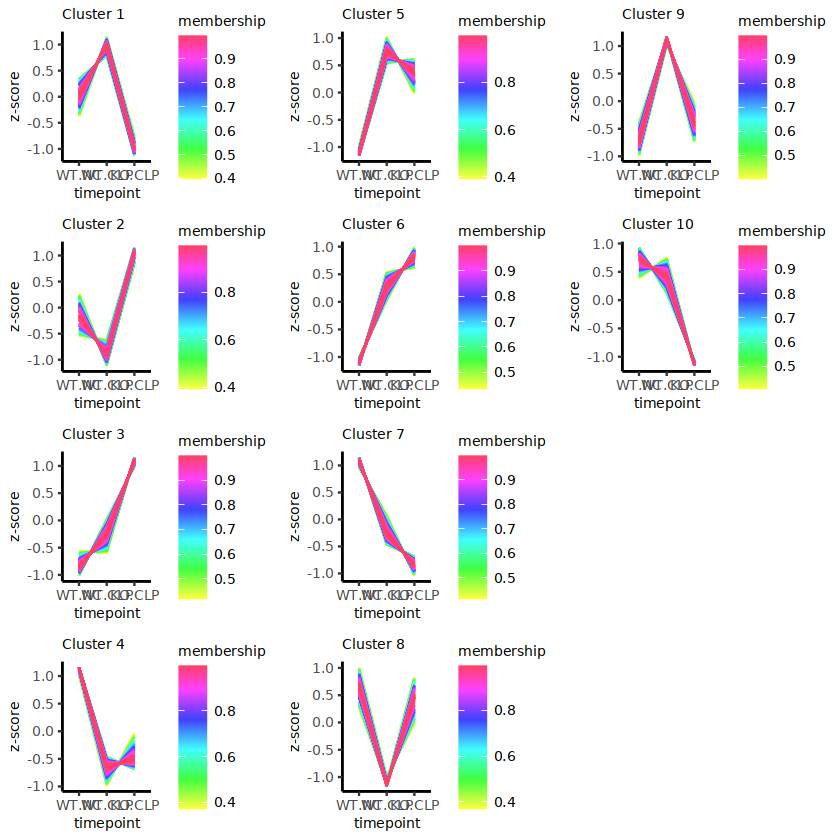

In [30]:
p <- timeclustplot(tcseq_cluster, value = 'z-score', cols = 3, 
    axis.line.size = 0.6, axis.title.size = 8, axis.text.size = 8, 
    title.size = 8, legend.title.size = 8, legend.text.size = 8)

In [48]:
protein_cluster <- tcseq_cluster@cluster
protein_cluster <- cbind(protein[names(protein_cluster), ], protein_cluster)
head(protein_cluster)

,WT.NC,WT.CLP,KO.CLP,protein_cluster
"LysoPC(20:4(5Z,8Z,11Z,14Z))",184507.0,98268.70,172675.59,8
LysoPC(18:0),1849168.0,1446962.55,2290621.46,2
LysoPC(16:0),2129105.4,1201036.86,2236969.83,8
7-Ketodeoxycholic acid,183605.4,398664.01,322832.41,5
LysoPC(18:1(11Z)),341167.0,259146.08,500518.71,2
LysoPC(15:0),32579.3,16556.61,33859.09,8


In [49]:
protein_cluster = as.data.frame(protein_cluster)

In [50]:
protein_cluster = protein_cluster %>% rownames_to_column(.,'metabolites')

In [51]:
write.csv(protein_cluster,file = 'protein_cluster.csv')

In [92]:
id = read.csv('/data/workdirV6/cnumber.csv')

In [93]:
head(id,2)

,Metabolites,kegg
,<chr>,<chr>
1,4-Aminohippuric acid,D06890
2,Imidazolepropionic acid,C20522


In [94]:
protein_cluster2 = merge(id,protein_cluster,by.x = 'Metabolites',by.y = 'metabolites')

In [136]:
head(protein_cluster2,4)

,Metabolites,kegg,WT.NC,WT.CLP,KO.CLP,protein_cluster
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,(-)-alpha-Bisabolol,C09621,14473.5659,15111.7440,15949.8105,3
2,(-)-alpha-Curcumene,C09649,4276.3315,4511.1803,4605.0901,6
3,(-)-alpha-Pinene,C06308,932.3996,924.8966,740.6990,10
4,(-)-Borneol,C01411,384.4498,300.1120,373.7849,8


In [52]:
kegg = read.csv('../workdirV6/KEGG_COMPOUND_PATHWAY_mmu.csv')

In [59]:
head(kegg)

,Pathway,NAME,CLASS1,CLASS2,PATHWAY_MAP,COMPOUND,COMPOUND_DESCRIPTION
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,mmu00010,Glycolysis / Gluconeogenesis - Mus musculus (house mouse),Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,C00022,Pyruvate
2,mmu00010,Glycolysis / Gluconeogenesis - Mus musculus (house mouse),Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,C00024,Acetyl-CoA
3,mmu00010,Glycolysis / Gluconeogenesis - Mus musculus (house mouse),Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,C00031,D-Glucose
4,mmu00010,Glycolysis / Gluconeogenesis - Mus musculus (house mouse),Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,C00033,Acetate
5,mmu00010,Glycolysis / Gluconeogenesis - Mus musculus (house mouse),Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,C00036,Oxaloacetate
6,mmu00010,Glycolysis / Gluconeogenesis - Mus musculus (house mouse),Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,C00068,Thiamin diphosphate


In [129]:
dd = kegg %>% dplyr::filter(PATHWAY_MAP %in% c('Arginine biosynthesis'))

In [130]:
head(dd,2)

,Pathway,NAME,CLASS1,CLASS2,PATHWAY_MAP,COMPOUND,COMPOUND_DESCRIPTION
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,mmu00220,Arginine biosynthesis - Mus musculus (house mouse),Metabolism,Amino acid metabolism,Arginine biosynthesis,C00011,CO2
2,mmu00220,Arginine biosynthesis - Mus musculus (house mouse),Metabolism,Amino acid metabolism,Arginine biosynthesis,C00014,Ammonia


In [131]:
table(dd$PATHWAY_MAP)


Arginine biosynthesis 
                   23 

In [132]:
head(protein_cluster2)

,Metabolites,kegg,WT.NC,WT.CLP,KO.CLP,protein_cluster
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,(-)-alpha-Bisabolol,C09621,14473.5659,15111.7440,15949.8105,3
2,(-)-alpha-Curcumene,C09649,4276.3315,4511.1803,4605.0901,6
3,(-)-alpha-Pinene,C06308,932.3996,924.8966,740.6990,10
4,(-)-Borneol,C01411,384.4498,300.1120,373.7849,8
5,(-)-Bornesitol,C03659,1839.7677,518.8245,292.4050,7
6,(-)-Dihydrocarveol,C11396,494.7748,542.6368,494.2646,9


In [133]:
table(protein_cluster2$protein_cluster)


  1   2   3   4   5   6   7   8   9  10 
 57  49  90 156  92 139 140  59 112  69 

In [134]:
dd2 = merge(dd,protein_cluster2,by.x = 'COMPOUND',by.y = 'kegg')

In [135]:
table(dd2$protein_cluster)


1 3 4 5 6 7 9 
2 1 1 1 2 2 1 